## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [5]:
df = pd.read_csv("german_credit (1).csv", sep=",", index_col=0)
pd.set_option('display.max_columns', None)
# Разделение признаков на типы
quantitative = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
binary = df.columns[df.nunique() == 2].tolist()
ordinal = df.select_dtypes(include=['category']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()
print(df.head(5))
print(df.tail(5))

                     duration                               credit_history  \
status                                                                       
no checking account        18      all credits at this bank paid back duly   
no checking account         9      all credits at this bank paid back duly   
... < 0 DM                 12  no credits taken/all credits paid back duly   
no checking account        12      all credits at this bank paid back duly   
no checking account        12      all credits at this bank paid back duly   

                        purpose  amount                     savings  \
status                                                                
no checking account  car (used)    1049  unknown/no savings account   
no checking account      others    2799  unknown/no savings account   
... < 0 DM           retraining     841               ... <  100 DM   
no checking account      others    2122  unknown/no savings account   
no checking account      ot

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [6]:
print(df.isnull().sum())

duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
avrg_amount = df.groupby('purpose')['amount'].mean()
print(avrg_amount)

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
young_clients = df[df['age'] < 30]
percentage_young_rent = (young_clients['housing'] == 'rent').mean() * 100
print("Процент людей, моложе 30, кто снимает жилье: ", percentage_young_rent)
old_clients = df[df['age'] > 40]
percentage_old_rent = (old_clients['housing'] == 'rent').mean() * 100
print("Процент людей, старше 40, кто снимает жилье: ", percentage_old_rent)


Процент людей, моложе 30, кто снимает жилье:  66.66666666666666
Процент людей, старше 40, кто снимает жилье:  68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [9]:
r = df[(df['foreign_worker']=='yes') & ((df['number_credits'] == '4-5') | (df['number_credits'] == '>= 6'))]
print("Количество иностранцев, у которых количество кредитов больше 3: ", r.shape[0])

Количество иностранцев, у которых количество кредитов больше 3:  1


### Задание 6 (1 балл)

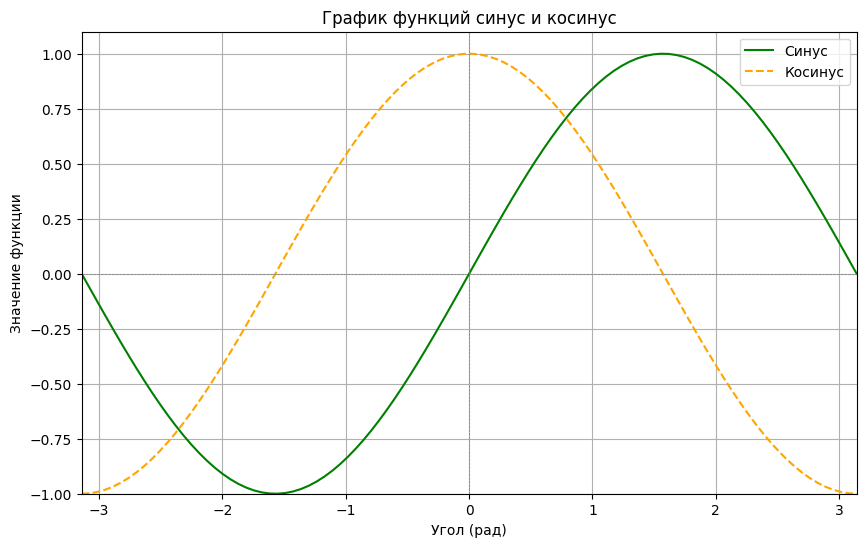

In [14]:
x = np.linspace(-np.pi, np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y_sin, label='Синус', color='green')
plt.plot(x, y_cos, label='Косинус', color='orange', linestyle='--')
plt.title('График функций синус и косинус')
plt.xlabel('Угол (рад)')
plt.ylabel('Значение функции')
plt.axhline(0, color='grey', linewidth=0.5, ls='--')
plt.axvline(0, color='grey', linewidth=0.5, ls='--')
plt.grid(True)
plt.legend()
plt.xlim(-np.pi, np.pi)
plt.ylim(-1, )
plt.show()

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

In [13]:
# your code here

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

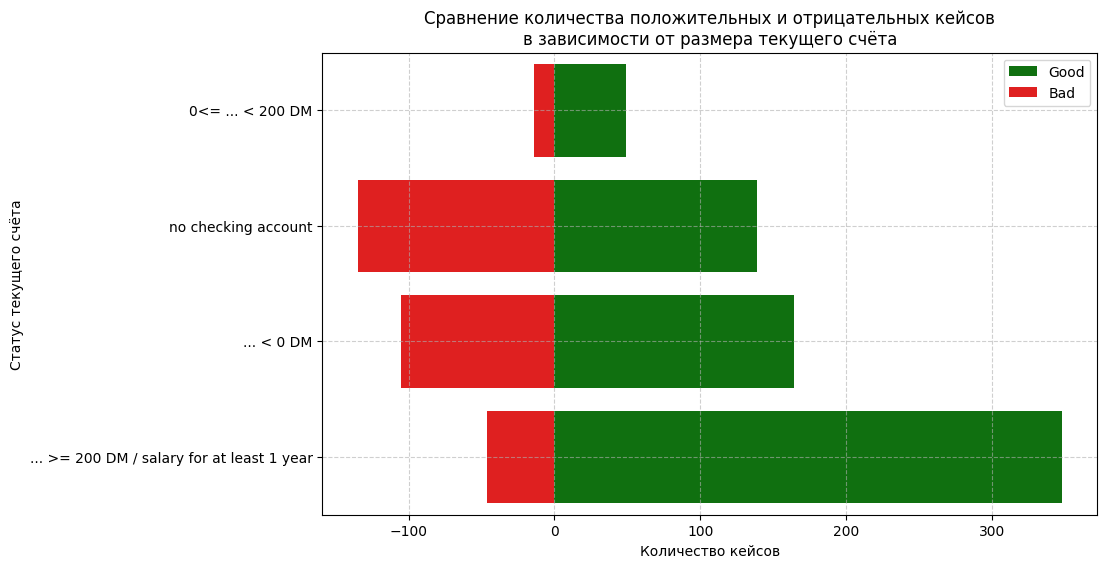

In [15]:
status_counts = df.groupby(['status', 'credit_risk']).size().unstack().fillna(0)
status_counts = status_counts.sort_values(by='good', ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=status_counts['good'], y=status_counts.index, color='green', label='Good', orient='h', ax=ax)
sns.barplot(x=-status_counts['bad'], y=status_counts.index, color='red', label='Bad', orient='h', ax=ax)
ax.set_xlabel("Количество кейсов")
ax.set_ylabel("Статус текущего счёта")
ax.set_title("Сравнение количества положительных и отрицательных кейсов\nв зависимости от размера текущего счёта")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Задание 8  (0.5 балла)

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

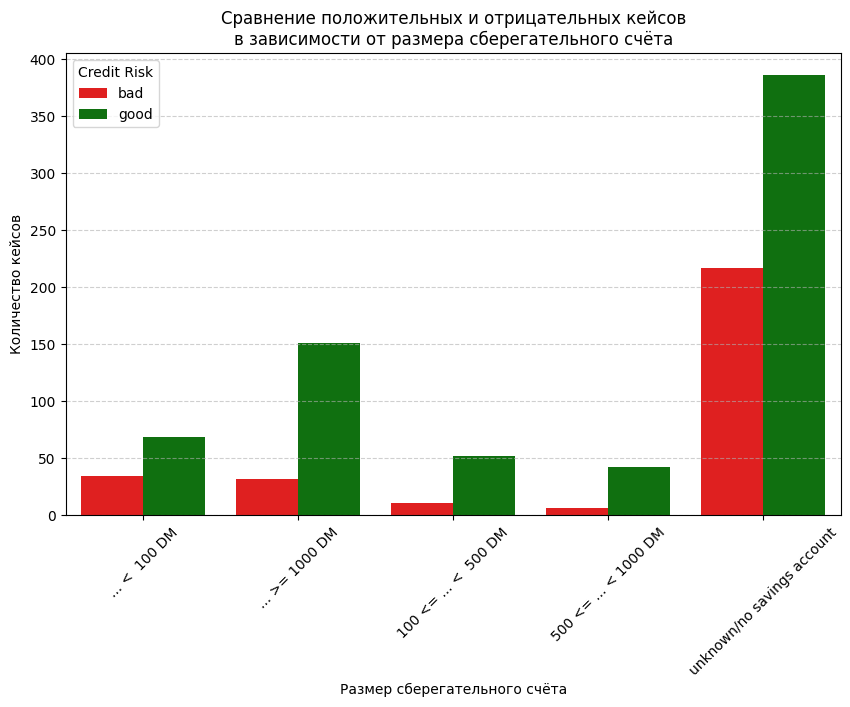

In [17]:
savings_counts = df.groupby(['savings', 'credit_risk']).size().unstack().fillna(0).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=savings_counts.melt(id_vars="savings", var_name="credit_risk", value_name="count"),
            x="savings", y="count", hue="credit_risk", palette={"good": "green", "bad": "red"})
plt.xlabel("Размер сберегательного счёта")
plt.ylabel("Количество кейсов")
plt.title("Сравнение положительных и отрицательных кейсов\nв зависимости от размера сберегательного счёта")
plt.xticks(rotation=45)  # Поворот подписей
plt.legend(title="Credit Risk")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

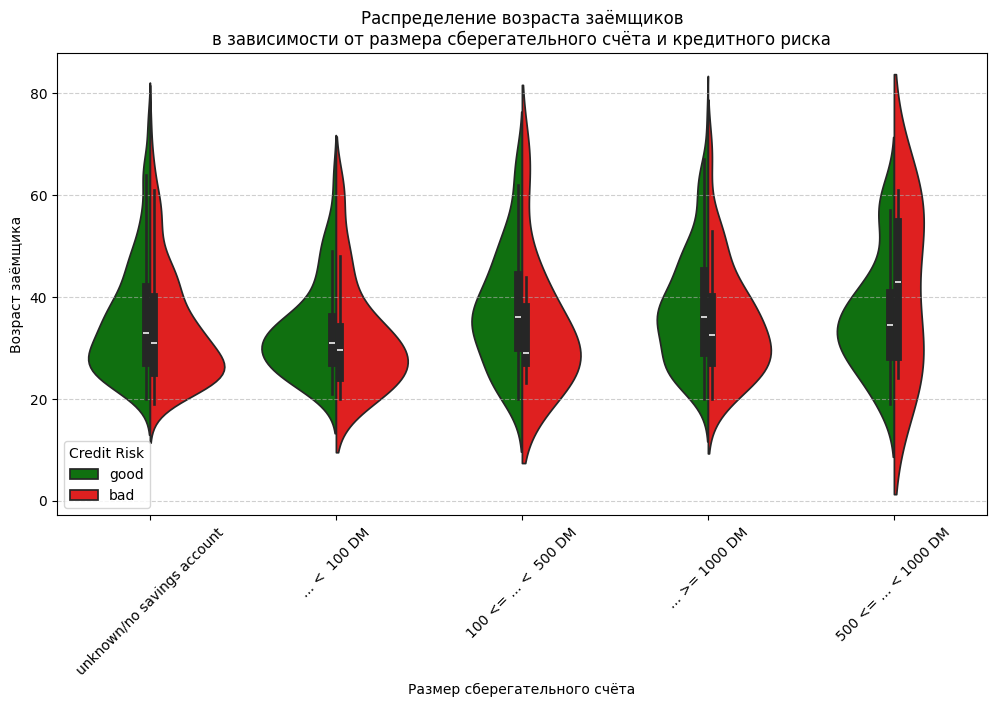

In [19]:
plt.figure(figsize=(12, 6))
# скрипичная диаграмма
sns.violinplot(data=df, x="savings", y="age", hue="credit_risk", split=True, palette={"good": "green", "bad": "red"})

# Оформление
plt.xlabel("Размер сберегательного счёта")
plt.ylabel("Возраст заёмщика")
plt.title("Распределение возраста заёмщиков\nв зависимости от размера сберегательного счёта и кредитного риска")
plt.xticks(rotation=45)  # Поворот подписей категорий
plt.legend(title="Credit Risk")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Отображение графика
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

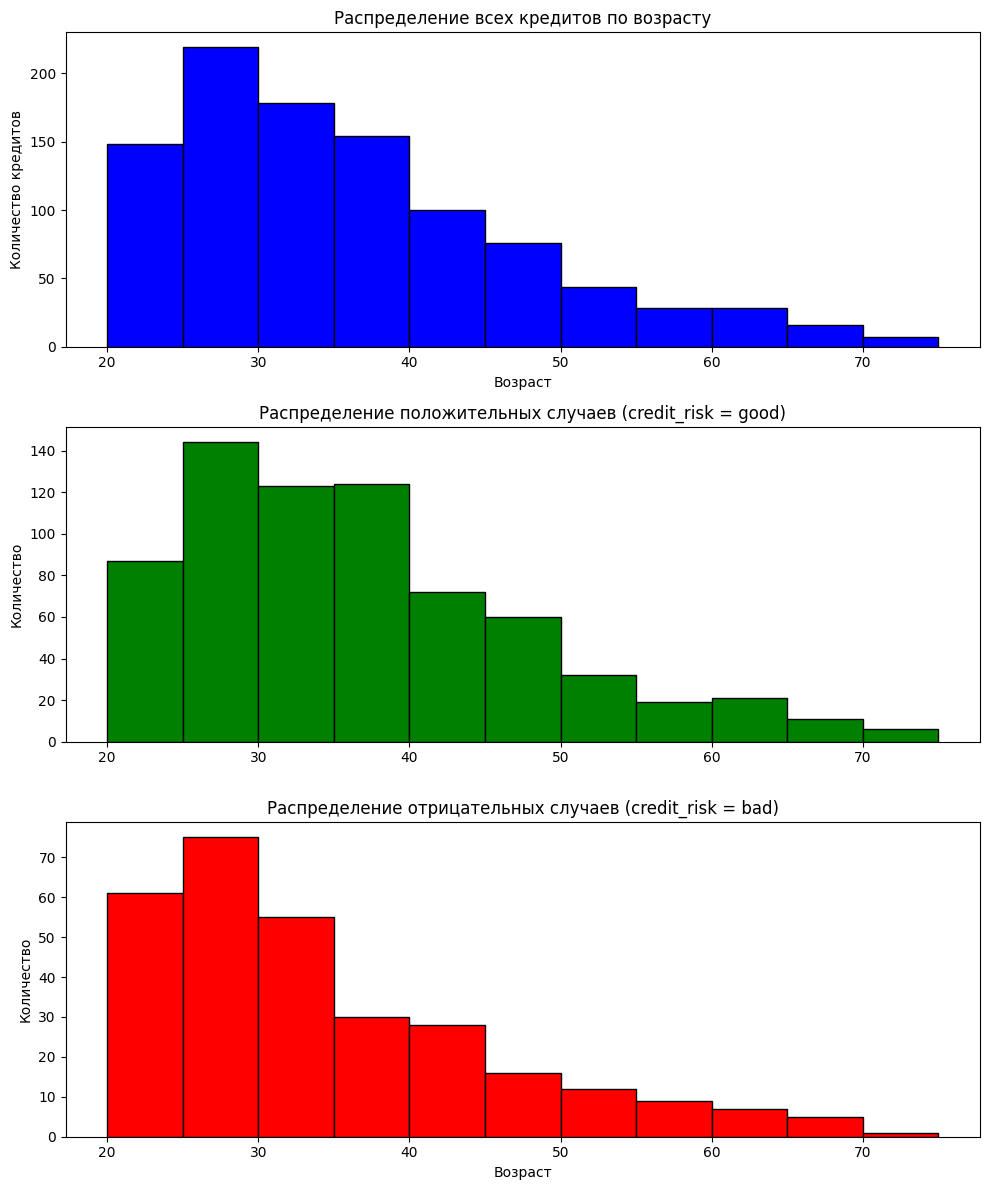

In [20]:
good_credit = df[df['credit_risk'] == 'good']
bad_credit = df[df['credit_risk'] == 'bad']

# Настройка параметров гистограммы
bins = range(20, 80, 5)  # Интервалы по 5 лет (20-25, 25-30 и т.д.)
colors = {'good': 'green', 'bad': 'red', 'all': 'blue'}

# Создание графиков
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Общее распределение всех кредитов
ax1.hist(df['age'], bins=bins, color=colors['all'], edgecolor='black')
ax1.set_title('Распределение всех кредитов по возрасту')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество кредитов')

# Распределение положительных случаев
ax2.hist(good_credit['age'], bins=bins, color=colors['good'], edgecolor='black')
ax2.set_title('Распределение положительных случаев (credit_risk = good)')
ax2.set_ylabel('Количество')

# Распределение отрицательных случаев
ax3.hist(bad_credit['age'], bins=bins, color=colors['bad'], edgecolor='black')
ax3.set_title('Распределение отрицательных случаев (credit_risk = bad)')
ax3.set_xlabel('Возраст')
ax3.set_ylabel('Количество')

plt.tight_layout()
plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

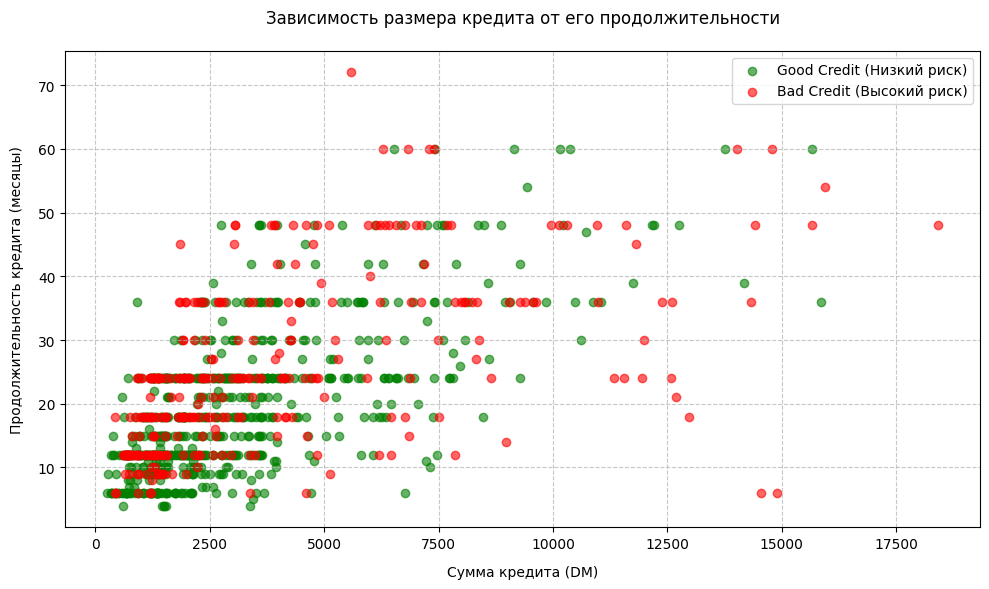

In [21]:
good = df[df['credit_risk'] == 'good']
bad = df[df['credit_risk'] == 'bad']

# Создание диаграммы рассеяния
plt.figure(figsize=(10, 6))

# Положительные случаи (good)
plt.scatter(good['amount'], good['duration'],
            color='green', alpha=0.6,
            label='Good Credit (Низкий риск)')

# Отрицательные случаи (bad)
plt.scatter(bad['amount'], bad['duration'],
            color='red', alpha=0.6,
            label='Bad Credit (Высокий риск)')

# Настройка графика
plt.title('Зависимость размера кредита от его продолжительности', pad=20)
plt.xlabel('Сумма кредита (DM)', labelpad=10)
plt.ylabel('Продолжительность кредита (месяцы)', labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Оптимизация отображения
plt.tight_layout()
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

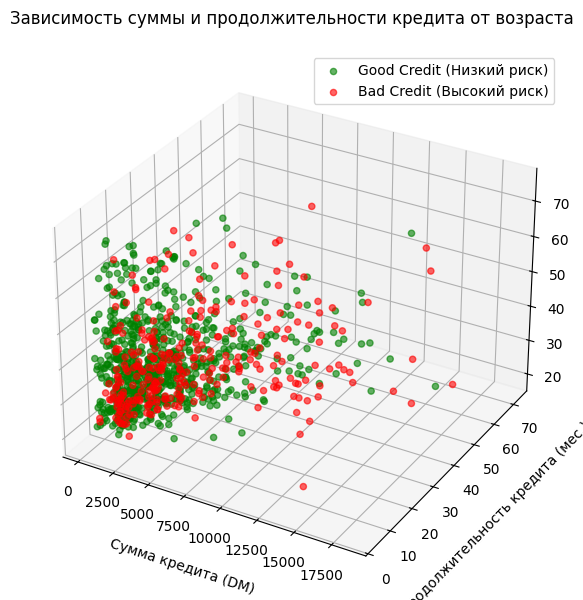

In [22]:
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Удаление возможных NaN значений
df = df.dropna(subset=['amount', 'duration', 'age', 'credit_risk']
# Разделение данных по кредитному риску
good = df[df['credit_risk'] == 'good']
bad = df[df['credit_risk'] == 'bad']
# Создание 3D-графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Добавление точек на график
ax.scatter(good['amount'], good['duration'], good['age'],
           color='green', alpha=0.6, label='Good Credit (Низкий риск)')

ax.scatter(bad['amount'], bad['duration'], bad['age'],
           color='red', alpha=0.6, label='Bad Credit (Высокий риск)')
# Настройка осей
ax.set_title('Зависимость суммы и продолжительности кредита от возраста', pad=20)
ax.set_xlabel('Сумма кредита (DM)', labelpad=10)
ax.set_ylabel('Продолжительность кредита (мес.)', labelpad=10)
ax.set_zlabel('Возраст (лет)', labelpad=10)
# Отображение легенды
ax.legend()
# Показ графика
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [24]:
df_numeric = df.copy()

# Преобразуем порядковые и бинарные признаки в числовые значения
for col in df_numeric.columns:
    if df_numeric[col].dtype == 'object':  # если признак строковый
        unique_values = df_numeric[col].nunique()
        if unique_values <= 10:  # считаем порядковым или бинарным, если значений <= 10
            df_numeric[col] = LabelEncoder().fit_transform(df_numeric[col])
        else:
            df_numeric.drop(columns=[col], inplace=True)  # удаляем категориальные

# Разделяем данные на признаки и целевую переменную
X = df_numeric.drop(columns=['credit_risk']).values
y = (df_numeric['credit_risk'] == 'good').astype(int).values  # Переводим 'good' в 1, 'bad' в 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [25]:
def predict(Xtest: np.array) -> np.array:
    """Линейная модель: если сумма взвешенных признаков выше порога, предсказывает 1 (good), иначе 0 (bad)."""
    weights = np.array([-0.5, 0.3, -0.2])  # Пример весов для (amount, age, duration)
    threshold = 0  # Пороговое значение
    scores = Xtest[:, :3] @ weights  # Линейная комбинация 3 признаков
    return (scores > threshold).astype(int)

# Оценка точности модели
accuracy = accuracy_score(y_test, predict(X_test))
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00
